In [1]:
import pandas as pd
import numpy as np
youtube_df=pd.read_csv(r"D:\Python files\Python Codes\Youtube Views prediction\Raw\youtube_train.csv",header=0)
#youtube_df['Type']='Train'

#df_test=pd.read_csv(r"D:\Python files\Python Codes\Youtube Views prediction\Raw\youtube_test.csv",header=0)
#df_test['Type']='Test'

#youtube_df=df_train.append(df_test, sort=False)

print(youtube_df.shape)
youtube_df.tail()


(4533, 19)


,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views
4528,UII58AGX12,2018-03-04,2018-03-05,27,The King of Random,9133669.0,Watch what Whipped Cream Does in a Vacuum Chamber,whipped cream|meringue|vacuum chamber|whipped|...,In today's video we're finding out if you can ...,9,10.0,1,,False,False,18016,13995,True,2030498
4529,ECJ91UNP40,2018-03-04,2018-03-05,24,Saturday Night Live,5292034.0,Cut for Time: Star Warriors - SNL,SNL|Saturday Night Live|SNL Season 43|Episode ...,"The Mos Eisley Five (Mikey Day, Kate McKinnon,...",3,8.0,1,94868,True,True,0,0,True,1323531
4530,AQR71GB@63,2018-03-04,2018-03-05,24,HellthyJunkFood,1568812.0,DIY TACO PIZZA 🌮🍕,taco pizza|diy taco pizza|taco pizza recipe|ta...,We highly recommend that everybody do this.\n\...,5,22.0,1,241644,True,False,7795,6940,True,904012
4531,PPD49TIn30,2018-03-04,2018-03-05,27,The Infographics Show,1607518.0,What Is Stone Man Syndrome?,stone man|stone man syndrome|fop|fibrodysplasi...,What is What Is Stone Man Syndrome? Can a pers...,7,15.0,2,,False,False,11795,10139,True,492313
4532,LOI64QVq10,2018-03-04,2018-03-05,117,UFC - Ultimate Fighting Championship,4381391.0,UFC 222: Brian Ortega Octagon Interview,ufc|222|brian|ortega|octagon|interview|joe|rog...,Hear from Brian Ortega inside of the Octagon a...,1,18.0,6,196618,True,False,12360,7695,True,1409175


In [2]:
#Splitting at last
#test1=youtube_df[youtube_df['Type']=='Test']
#test1.head()

In [3]:
#Checking for invalid values
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Video_id               4533 non-null   object 
 1   publish_date           4531 non-null   object 
 2   trending_date          4531 non-null   object 
 3   category_id            4526 non-null   object 
 4   channel_title          4530 non-null   object 
 5   subscriber             4502 non-null   float64
 6   title                  4531 non-null   object 
 7   tags                   4325 non-null   object 
 8   description            4443 non-null   object 
 9   Trend_day_count        4533 non-null   int64  
 10  Tag_count              4532 non-null   float64
 11  Trend_tag_count        4532 non-null   object 
 12  comment_count          4533 non-null   object 
 13  comment_disabled       4533 non-null   bool   
 14  like dislike disabled  4533 non-null   bool   
 15  like

In [4]:
youtube_df['publish_date']=pd.to_datetime(youtube_df['publish_date'])
youtube_df['trending_date']=pd.to_datetime(youtube_df['trending_date'])
youtube_df['Trending_start_day']=(youtube_df['trending_date']-youtube_df['publish_date']).dt.days

In [5]:
#breaking dates into year, month and day
youtube_df['publish_year']=youtube_df['publish_date'].dt.year
youtube_df['publish_month']=youtube_df['publish_date'].dt.month
youtube_df['publish_day']=youtube_df['publish_date'].dt.day

youtube_df['trending_year']=youtube_df['trending_date'].dt.year
youtube_df['trending_month']=youtube_df['trending_date'].dt.month
youtube_df['trending_day']=youtube_df['trending_date'].dt.day

youtube_df.head(2)

,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,...,dislike,tag appered in title,views,Trending_start_day,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day
0,HDR9SQc79,2017-11-13,2017-11-20,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6,...,6089,False,1978978,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0
1,KNH52UF?48,2017-11-13,2017-11-20,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1,...,3044,False,1487870,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0


In [6]:
print(youtube_df.shape)
youtube_df.isnull().sum()

(4533, 26)


Video_id                   0
publish_date               2
trending_date              2
category_id                7
channel_title              3
subscriber                31
title                      2
tags                     208
description               90
Trend_day_count            0
Tag_count                  1
Trend_tag_count            1
comment_count              0
comment_disabled           0
like dislike disabled      0
likes                      0
dislike                    0
tag appered in title       1
views                      0
Trending_start_day         4
publish_year               2
publish_month              2
publish_day                2
trending_year              2
trending_month             2
trending_day               2
dtype: int64

In [7]:
#youtube_df.describe(include="all")

In [8]:
# Convert cat_id and views from obj to numeric. Also remove invalid values from the 2 columns before doing so

In [9]:
youtube_df['category_id']=youtube_df['category_id'].replace("“24",np.nan)
youtube_df['category_id']=pd.to_numeric(youtube_df['category_id'])
youtube_df['category_id'].dtypes

dtype('float64')

In [10]:
youtube_df['Trend_tag_count']=youtube_df['Trend_tag_count'].replace(">",np.nan)
youtube_df['Trend_tag_count']=pd.to_numeric(youtube_df['Trend_tag_count'])
youtube_df['Trend_tag_count'].dtypes

dtype('float64')

In [11]:
youtube_df['views']=youtube_df['views'].replace("#VALUE!",np.nan)
youtube_df['views']=pd.to_numeric(youtube_df['views'])
youtube_df['views'].dtypes

dtype('float64')

In [12]:
youtube_df['tag appered in title']=youtube_df['tag appered in title'].astype(bool) #Use this even for convrting numbs
print(youtube_df['tag appered in title'].unique())
youtube_df['tag appered in title'].dtypes

[False  True]


dtype('bool')

In [13]:
youtube_df['comment_count']=youtube_df['comment_count'].replace(" ",0)
youtube_df['comment_count']=youtube_df['comment_count'].astype(float)
#youtube_df['comment_count']%1!=0
#print(youtube_df['comment_count']==float)
print(youtube_df['comment_count'].dtypes)
#print(youtube_df['comment_disabled'].unique)

float64


In [14]:
#Handling NaN values in DF
#is_NaN = youtube_df.isnull() #creates a DF with T/F against null and non null values 

#row_has_NaN = is_NaN.any(axis=1) #stores index numbers of rows where there is any NaN value

#rows_with_NaN = youtube_df[row_has_NaN] #creates a new DF with index= row_has_NaN
#rows_with_NaN
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4533 entries, 0 to 4532
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Video_id               4533 non-null   object        
 1   publish_date           4531 non-null   datetime64[ns]
 2   trending_date          4531 non-null   datetime64[ns]
 3   category_id            4525 non-null   float64       
 4   channel_title          4530 non-null   object        
 5   subscriber             4502 non-null   float64       
 6   title                  4531 non-null   object        
 7   tags                   4325 non-null   object        
 8   description            4443 non-null   object        
 9   Trend_day_count        4533 non-null   int64         
 10  Tag_count              4532 non-null   float64       
 11  Trend_tag_count        4531 non-null   float64       
 12  comment_count          4533 non-null   float64       
 13  com

In [15]:
#Drop all Nan values
youtube_df=youtube_df.dropna(subset=['publish_date','trending_date','Trending_start_day','category_id','subscriber','Tag_count','Trend_tag_count','tag appered in title'],axis=0)
youtube_df.shape

(4487, 26)

# Splitting 'category_id','tag appeared in title','comment_disabled','like dislike disabled'using get_dummies encoder

In [16]:
youtube_df['category_id']=youtube_df['category_id'].astype(int)

cat_ids=pd.get_dummies(youtube_df['category_id'],prefix='cat_id',drop_first=True)
tag_appeared=pd.get_dummies(youtube_df['tag appered in title'],prefix='tag_in_title',drop_first=True)
comment_dis=pd.get_dummies(youtube_df['comment_disabled'],prefix='comment_disabled',drop_first=True)
like_dislike_dis=pd.get_dummies(youtube_df['like dislike disabled'],prefix='Likes_disabled',drop_first=True)


In [17]:
like_dislike_dis.shape

(4487, 1)

In [18]:
#To join new DF with existing DF use concat as the DF after get_dummies misses the indexes. 
youtube_df=pd.concat([youtube_df,cat_ids,tag_appeared,comment_dis,like_dislike_dis],axis=1)
pd.set_option('display.max_columns', None) # Shows all columns instead of showing ... in between
youtube_df.head(2)

,Video_id,publish_date,trending_date,category_id,channel_title,subscriber,title,tags,description,Trend_day_count,Tag_count,Trend_tag_count,comment_count,comment_disabled,like dislike disabled,likes,dislike,tag appered in title,views,Trending_start_day,publish_year,publish_month,publish_day,trending_year,trending_month,trending_day,cat_id_2,cat_id_10,cat_id_15,cat_id_17,cat_id_19,cat_id_20,cat_id_22,cat_id_23,cat_id_24,cat_id_25,cat_id_26,cat_id_27,cat_id_28,cat_id_29,cat_id_43,cat_id_117,cat_id_122,cat_id_210,cat_id_224,cat_id_226,cat_id_2225,tag_in_title_True,comment_disabled_True,Likes_disabled_True
0,HDR9SQc79,2017-11-13,2017-11-20,22,CaseyNeistat,9086142.0,WE WANT TO TALK ABOUT OUR MARRIAGE,SHANtell martin,SHANTELL'S CHANNEL - https://www.youtube.com/s...,6,21.0,6.0,0.0,False,False,13342,6089,False,1978978.0,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,KNH52UF?48,2017-11-13,2017-11-20,24,LastWeekTonight,5937292.0,The Trump Presidency: Last Week Tonight with J...,last week tonight trump presidency|last week t...,"One year after the presidential election, John...",1,23.0,1.0,116266.0,True,False,5761,3044,False,1487870.0,7.0,2017.0,11.0,13.0,2017.0,11.0,20.0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [19]:
#youtube_df.shape
youtube_df['comment_count'].isnull().sum()

0

In [20]:
youtube_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4487 entries, 0 to 4532
Data columns (total 50 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Video_id               4487 non-null   object        
 1   publish_date           4487 non-null   datetime64[ns]
 2   trending_date          4487 non-null   datetime64[ns]
 3   category_id            4487 non-null   int32         
 4   channel_title          4485 non-null   object        
 5   subscriber             4487 non-null   float64       
 6   title                  4485 non-null   object        
 7   tags                   4286 non-null   object        
 8   description            4398 non-null   object        
 9   Trend_day_count        4487 non-null   int64         
 10  Tag_count              4487 non-null   float64       
 11  Trend_tag_count        4487 non-null   float64       
 12  comment_count          4487 non-null   float64       
 13  com

In [21]:
#Dropping values which we think are not needed in the model

youtube_df_final=youtube_df.drop(['Video_id','trending_date','category_id','channel_title','title','tags','description','comment_disabled','like dislike disabled','tag appered in title','publish_year','publish_month','publish_day','trending_year','trending_month','trending_day'],axis=1)
print(youtube_df_final.shape)
youtube_df_final.info()

(4487, 34)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 4487 entries, 0 to 4532
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   publish_date           4487 non-null   datetime64[ns]
 1   subscriber             4487 non-null   float64       
 2   Trend_day_count        4487 non-null   int64         
 3   Tag_count              4487 non-null   float64       
 4   Trend_tag_count        4487 non-null   float64       
 5   comment_count          4487 non-null   float64       
 6   likes                  4487 non-null   int64         
 7   dislike                4487 non-null   int64         
 8   views                  4487 non-null   float64       
 9   Trending_start_day     4487 non-null   float64       
 10  cat_id_2               4487 non-null   uint8         
 11  cat_id_10              4487 non-null   uint8         
 12  cat_id_15              4487 non-null   uint8       

In [22]:
#Splitting data frame into train and test
#test1=youtube_df[youtube_df['Type']=='Test']
#test1.head()

# Handling Outliers
variables- subscriber, ,views, trend day count, tag count and trend tag coun. 

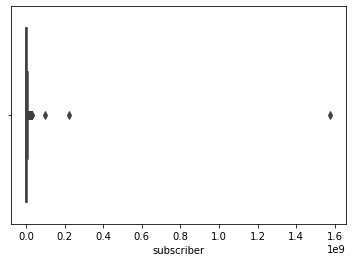

In [23]:
import seaborn as sns
sns.boxplot(youtube_df_final['subscriber'])

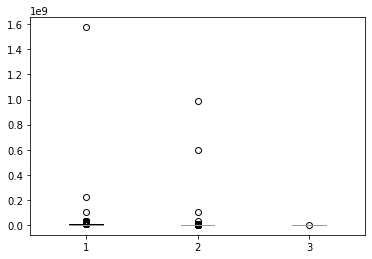

In [24]:
#Generate the data
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot((youtube_df_final['subscriber'],youtube_df_final['views'],youtube_df_final['Trend_day_count']))

plt.show()

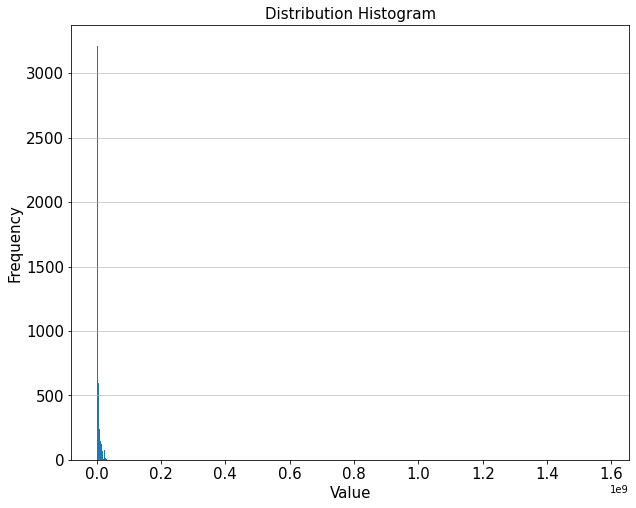

In [25]:
plt.figure(figsize=[10,8])

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Distribution Histogram',fontsize=15)
plt.hist(youtube_df_final['subscriber'], bins = 500)
plt.show()

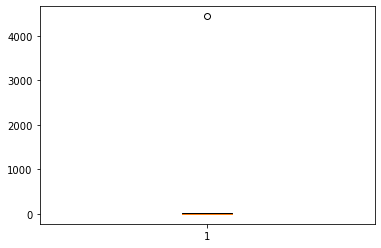

In [26]:
%matplotlib inline
plt.boxplot((youtube_df_final['Trend_day_count']))

plt.show()

In [27]:
youtube_df_final.describe()

,subscriber,Trend_day_count,Tag_count,Trend_tag_count,comment_count,likes,dislike,views,Trending_start_day,cat_id_2,cat_id_10,cat_id_15,cat_id_17,cat_id_19,cat_id_20,cat_id_22,cat_id_23,cat_id_24,cat_id_25,cat_id_26,cat_id_27,cat_id_28,cat_id_29,cat_id_43,cat_id_117,cat_id_122,cat_id_210,cat_id_224,cat_id_226,cat_id_2225,tag_in_title_True,comment_disabled_True,Likes_disabled_True
count,4.487000e+03,4487.000000,4487.000000,4487.000000,4487.000000,4.487000e+03,4487.000000,4.487000e+03,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.00000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000,4487.000000
mean,3.569819e+06,7.548028,17.970359,6.220192,111526.691331,9.799145e+03,5872.022732,1.399991e+06,34.825496,0.014709,0.125251,0.025184,0.066414,0.01092,0.011589,0.075552,0.083352,0.242255,0.096055,0.091152,0.038333,0.063963,0.002897,0.000446,0.000446,0.000223,0.000223,0.000223,0.000223,0.000223,0.665924,0.679741,0.253622
std,2.423985e+07,66.335284,67.896362,147.792328,101345.012148,1.925572e+04,4829.556908,1.734512e+07,249.139913,0.120399,0.331040,0.156701,0.249032,0.10394,0.107039,0.264309,0.276444,0.428496,0.294700,0.287858,0.192020,0.244713,0.053754,0.021110,0.021110,0.014929,0.014929,0.014929,0.014929,0.014929,0.471719,0.466628,0.435132
min,0.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.428800e+05,4.000000,12.000000,2.000000,0.000000,0.000000e+00,0.000000,4.274295e+05,5.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.186609e+06,7.000000,17.000000,4.000000,98230.000000,1.042900e+04,5455.000000,7.076810e+05,6.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,3.766915e+06,10.000000,21.000000,6.000000,201818.500000,1.502700e+04,10156.500000,1.176092e+06,7.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.576229e+09,4444.000000,3225.000000,9903.000000,299877.000000,1.213628e+06,14916.000000,9.898735e+08,4215.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


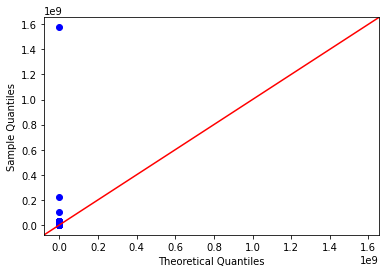

In [28]:
#QQ plot
import statsmodels.api as sm
import pylab as py
sm.qqplot(youtube_df_final['subscriber'], line ='45') 
py.show()

In [29]:
import probscale
clear_bkgd = {'axes.facecolor':'none', 'figure.facecolor':'none'}
sns.set(style='ticks', context='notebook', palette="muted", rc=clear_bkgd)

fig, ax = plt.subplots(figsize=(8, 4))

x = youtube_df_final['subscriber']
y = np.arange(0, 12.1, 1)

ax.set_xlim(40, 99.5)
ax.set_xscale('prob')

ax.plot(x, y)
sns.despine(fig=fig)

ModuleNotFoundError: No module named 'probscale'

In [ ]:
Q1_v1=youtube_df_final.quantile(0.25,)
print(Q1_v1)
#so looks like only subscriber and views can have possible outliers

In [ ]:
Q1=np.percentile(youtube_df['views'], 25, interpolation='higher') #this and the next code give same output but prefer second as it can be used on entire DF too)
Q3=youtube_df['views'].quantile(0.75, interpolation='higher')
IQR=Q3-Q1
IQR